### Figure 4: QQ plot

In [1]:
import numpy as np
from libpysal.weights import lat2W
import seaborn as sns
import matplotlib.pyplot as plt
import xesmf as xe
# sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
model = ''
# set mode
mode = 'validation'
print(np.load('/user/home/al18709/work/tc_data_mswep/valid_X.npy').shape)


# load datasets
real = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode))[0][:,:,:,0]
pred = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0][:,:,:,0]

pred_cnn = np.load('/user/home/al18709/work/cnn/unet_valid.npy')
pred_dsrnngan = np.load('/user/home/al18709/work/dsrnngan_predictions/validation_pred-opt.npy')[0][:,:,:,0]
pred_vaegan = np.load('/user/home/al18709/work/vaegan/predictions/validation_pred.npy')[0][:,:,:,0]

# pred_ensemble_vaegan = np.load('/user/home/al18709/work/vaegan/predictions/validation_pred.npy')[0]
# pred_ensemble_gan = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0]
inputs = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_input-opt.npy' % (model,mode))[0][:,:,:,0]

# regrid inputs
grid_in = {"lon": np.linspace(0, 100, 10), "lat": np.linspace(0, 100, 10)}
grid_out = {"lon": np.linspace(0, 100, 100), "lat": np.linspace(0, 100, 100)}
regridder = xe.Regridder(grid_in, grid_out, "bilinear")
inputs_hr = regridder(inputs)


(16253, 10, 10)


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


In [3]:
percentiles = [10,20,30,40,50,60,70,80,90,95,99,99.5]
real_percentiles,inputs_percentils,unet_percentiles,vaegan_percentiles,dsrnngan_percentiles = [],[],[],[],[]
for q in percentiles:
	real_p = np.percentile(real.flatten(),q)
	inputs_p = np.percentile(inputs_hr.flatten(),q)
	unet_p = np.percentile(pred_cnn.flatten(),q)
	vaegan_p = np.percentile(pred_vaegan.flatten(),q)
	dsrnngan_p = np.percentile(pred_dsrnngan.flatten(),q)
	real_percentiles.append(real_p)
	inputs_percentils.append(inputs_p)
	unet_percentiles.append(unet_p)
	vaegan_percentiles.append(vaegan_p)
	dsrnngan_percentiles.append(dsrnngan_p)



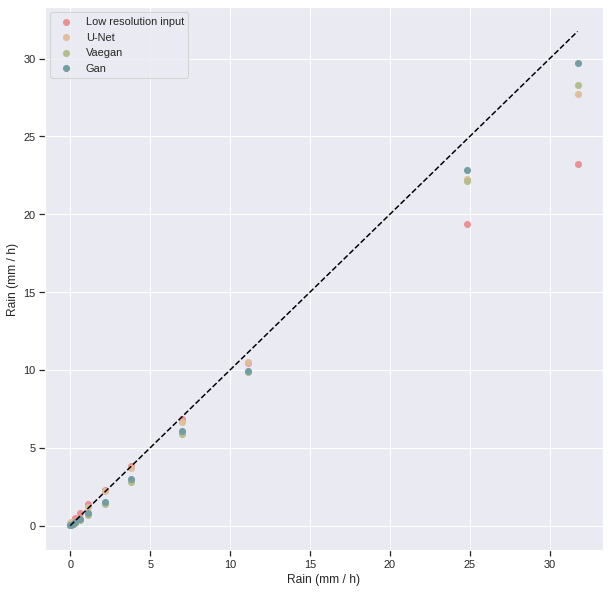

In [19]:
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (10,10)
sns.set_context("notebook")
plt.scatter(real_percentiles,inputs_percentils,color='#ec9192')
plt.scatter(real_percentiles,unet_percentiles,color='#dfbe99')
plt.scatter(real_percentiles,vaegan_percentiles,color='#b5bd89')
plt.scatter(real_percentiles,dsrnngan_percentiles,color='#729ea1')
plt.plot(real_percentiles,real_percentiles,'--',color='black')
plt.legend(['Low resolution input','U-Net','VAEGAN','GAN'],frameon=True)
plt.xlabel('Rain (mm / h)')
plt.ylabel('Rain (mm / h)')
plt.savefig('qq_plot')
plt.show()


# 
# 

In [ ]:
# QQ plot, x axis = obs quantiles, y axis is same and points are model quartiles